In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

jwst_file= pd.read_csv('JWST_proposals - Sheet1 new.csv',
                       usecols= ['NAME','LOGRDUST95','n1330','JWST_prop'])

jwst_file2= pd.read_csv('JWST_proposals - Sheet1 new.csv',
                       usecols= ['NAME','MSTAR','LOGLACC','JWST_prop'])

In [11]:
jwst_file

,NAME,LOGRDUST95,n1330,JWST_prop
0,04385+2550,1.3435,0.73,pebble
1,AATau,2.0900,-0.36,GTO
2,AS205N,1.7000,-0.19,DSHARP
3,AS209,2.1400,-0.28,DSHARP
4,BPTau,1.6200,-0.36,GTO
...,...,...,...,...
102,WaOph6,2.0100,-0.40,GTO
103,WSB52,1.5000,0.04,DSHARP
104,WSB60,1.8600,0.18,NaN
105,WXCha,1.2490,-1.03,GTO


In [12]:
jwst_file2

,NAME,MSTAR,LOGLACC,JWST_prop
0,04385+2550,0.50,-1.228,pebble
1,AATau,0.60,-1.430,GTO
2,AS205N,0.87,-0.070,DSHARP
3,AS209,0.96,-1.120,DSHARP
4,BPTau,0.54,-1.170,GTO
...,...,...,...,...
102,WaOph6,0.63,-0.660,GTO
103,WSB52,0.48,-0.700,DSHARP
104,WSB60,0.24,NaN,NaN
105,WXCha,0.50,-0.832,GTO


In [14]:
jwst_file=jwst_file.dropna(subset=['LOGRDUST95','n1330'])  #NaN data is dropped and the data is reindexed 
jwst_file=jwst_file.reset_index(drop=True)                 #resets the index for the rows
jwst_file=jwst_file.fillna('0')                            #replaces nan values in the column with '0'



In [15]:
jwst_file

,NAME,LOGRDUST95,n1330,JWST_prop
0,04385+2550,1.3435,0.73,pebble
1,AATau,2.0900,-0.36,GTO
2,AS205N,1.7000,-0.19,DSHARP
3,AS209,2.1400,-0.28,DSHARP
4,BPTau,1.6200,-0.36,GTO
...,...,...,...,...
76,WaOph6,2.0100,-0.40,GTO
77,WSB52,1.5000,0.04,DSHARP
78,WSB60,1.8600,0.18,0
79,WXCha,1.2490,-1.03,GTO


In [16]:
jwst_file2=jwst_file2.dropna(subset=['MSTAR','LOGLACC'])  #NaN data is dropped and the data is reindexed 
jwst_file2=jwst_file2.reset_index(drop=True)              #resets the index for the rows
jwst_file2=jwst_file2.fillna('0')                         #replaces nan values in the column with '0'

jwst_file2

,NAME,MSTAR,LOGLACC,JWST_prop
0,04385+2550,0.50,-1.228,pebble
1,AATau,0.60,-1.430,GTO
2,AS205N,0.87,-0.070,DSHARP
3,AS209,0.96,-1.120,DSHARP
4,BPTau,0.54,-1.170,GTO
...,...,...,...,...
66,VZCha,0.80,-0.730,Klaus
67,WaOph6,0.63,-0.660,GTO
68,WSB52,0.48,-0.700,DSHARP
69,WXCha,0.50,-0.832,GTO


In [17]:
#Make the columns into arrays to then plot

MSTAR_list=jwst_file2.MSTAR
MSTAR_ar= np.array(MSTAR_list)

LOGLACC_list=jwst_file2.LOGLACC
LOGLACC_ar= np.array(LOGLACC_list)

n1330_list=jwst_file.n1330
n1330_ar= np.array(n1330_list)

RDUST_list=jwst_file.LOGRDUST95
RDUST_ar= np.array(RDUST_list)

name_list=jwst_file.NAME
name_ar= np.array(name_list)

prop_list=jwst_file.JWST_prop
prop_ar= np.array(prop_list)

name_list2=jwst_file2.NAME
name_ar2= np.array(name_list2)

prop_list2=jwst_file2.JWST_prop
prop_ar2= np.array(prop_list2)

In [18]:
col=[]   #color list 


for i in range(len(prop_ar)):  #assigns a color to each indexed element 
    if prop_ar[i]== 'GTO':
        col.append('orange')
       
        
    if prop_ar[i]=='pebble':
        col.append('b')
        
    if prop_ar[i]=='Klaus':
        col.append('#00FF00')   #lime green in hexidecimal, easier than RGB. Just look up the color in google 
        
        
    if prop_ar[i]=='DSHARP':
        col.append('r')
        
    if prop_ar[i]=='0':
        col.append('k') 
        
col2=[]        
        
for i in range(len(prop_ar2)):  #assigns a color to each indexed element 
    if prop_ar2[i]== 'GTO':
        col2.append('orange')
       
        
    if prop_ar2[i]=='pebble':
        col2.append('b')
        
    if prop_ar2[i]=='Klaus':
        col2.append('#00FF00')   #lime green in hexidecimal, easier than RGB. Just look up the color in google 
        
        
    if prop_ar2[i]=='DSHARP':
        col2.append('r')
        
    if prop_ar2[i]=='0':
        col2.append('k') 
        


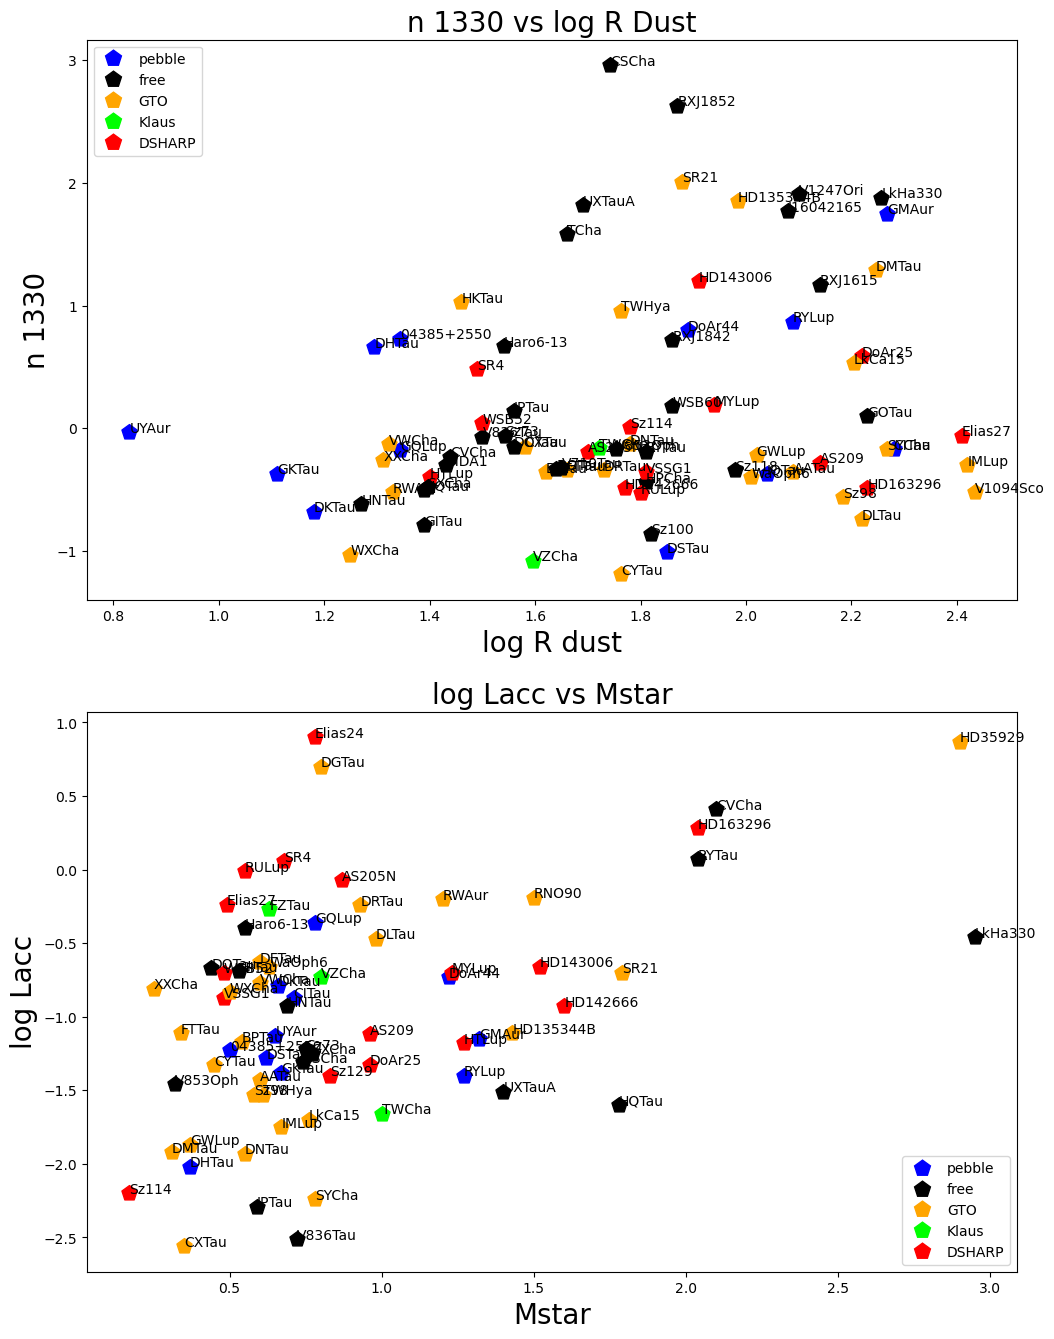

In [19]:
 #fig.savefig('jwst graph IV.png')
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(12,16))   

for i in range(len(prop_ar)): 
         # plotting the corresponding x with y  
         # and respective color 
    ax1.scatter(RDUST_ar[i], n1330_ar[i], c = col[i],marker=(5,0), s=130) 
    
    
for i in range(len(prop_ar2)):     
     ax2.scatter(MSTAR_ar[i], LOGLACC_ar[i], c = col2[i],marker=(5,0), s=130) 
        
        
###Top plot custamization####
ax1.set_ylabel('n 1330',fontsize=20)
ax1.set_xlabel('log R dust',fontsize=20)
ax1.set_title('n 1330 vs log R Dust',fontsize=20)
###Bottom plot custamization######
ax2.set_ylabel('log Lacc',fontsize=20)
ax2.set_xlabel('Mstar',fontsize=20)
ax2.set_title('log Lacc vs Mstar',fontsize=20)


for i, txt in enumerate(name_ar):                        ##Labeling each data point with its name 
    ax1.annotate(txt, (RDUST_ar[i], n1330_ar[i]))
                  
                  
for i, txt in enumerate(name_ar2):    
      ax2.annotate(txt, (MSTAR_ar[i], LOGLACC_ar[i]))
    
######CREATING THE LEGEND ELEMENTS######
import matplotlib.lines as mlines

lgd_pebble = mlines.Line2D([], [], color='blue', marker=(5,0),
                          markersize=12, label='pebble',linestyle= 'None')

lgd_free = mlines.Line2D([], [], color='k', marker=(5,0),
                          markersize=12, label='free',linestyle= 'None')

lgd_GTO = mlines.Line2D([], [], color='orange', marker=(5,0),
                          markersize=12, label='GTO',linestyle= 'None')

lgd_Klaus = mlines.Line2D([], [], color='#00FF00', marker=(5,0),
                          markersize=12, label='Klaus',linestyle= 'None')

lgd_DSHARP = mlines.Line2D([], [], color='red', marker=(5,0),
                          markersize=12, label='DSHARP',linestyle= 'None')

ax1.legend(handles=[lgd_pebble,lgd_free,lgd_GTO,lgd_Klaus,lgd_DSHARP],loc='upper left')
ax2.legend(handles=[lgd_pebble,lgd_free,lgd_GTO,lgd_Klaus,lgd_DSHARP],loc='lower right')
